In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

rng = np.random.default_rng(seed=0)

In [2]:
grid_count = 5
sin_list = [np.sin(x * 2 * np.pi / 5) for x in np.arange(5)]
cos_list = [np.cos(x * 2 * np.pi / 5) for x in np.arange(5)]
offsets = np.array([.2, .2, .2, .2, .2])

vectors = np.column_stack([np.arange(grid_count),
                    sin_list,
                    cos_list,
                    offsets])
vectors


array([[ 0.        ,  0.        ,  1.        ,  0.2       ],
       [ 1.        ,  0.95105652,  0.30901699,  0.2       ],
       [ 2.        ,  0.58778525, -0.80901699,  0.2       ],
       [ 3.        , -0.58778525, -0.80901699,  0.2       ],
       [ 4.        , -0.95105652,  0.30901699,  0.2       ]])

In [3]:
class Line:
    # a*x + b*y = c
    def __init__(self, a, b, c, grid):
        self.a = a
        self.b = b
        self.c = c
        self.grid = grid

    # Build function to get lines that hit boundaries
    # Maybe use build intersection function and use a line for each boundary!!!???
    def determine_intersection(self, other_line):
        denom = (self.a * other_line.b) - (other_line.a * self.b)
        if denom == 0:
            return (np.inf, np.inf)
        else:
            x = (other_line.b * self.c) - (self.b * other_line.c)
            x = x / denom

            y = (self.a * other_line.c) - (other_line.a * self.c)
            y = y / denom

            return (x, y)

# Using standard form, a and b are the cos, sin list, while c is k

In [4]:
l1 = Line(vectors[0, 1], vectors[0, 2], vectors[0, 3], vectors[0, 0])


In [5]:
b1 = Line(0, 1, 5, 0)
b2 = Line(0, 1, -5, 0)
b3 = Line(1, 0, 5, 0)
b4 = Line(1, 0, -5, 0)

i1 = l1.determine_intersection(b1)
i2 = l1.determine_intersection(b2)
i3 = l1.determine_intersection(b3)
i4 = l1.determine_intersection(b4)
print(i1, i2, i3, i4)

(inf, inf) (inf, inf) (5.0, 0.2) (-5.0, 0.2)


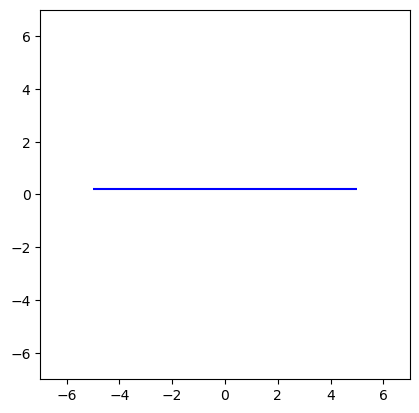

In [6]:
lines = [[i3, i4]]
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_aspect('equal')
plt.show()

In [7]:
boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

points = []
for b in boundary:
    intersection = l1.determine_intersection(b)
    if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
        points.append(intersection)

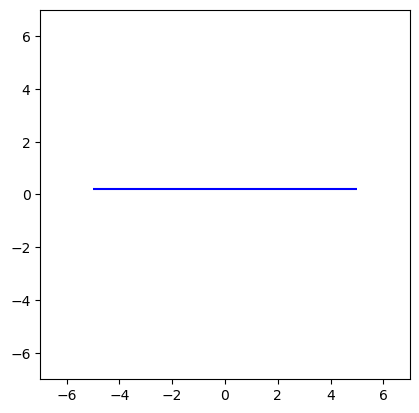

In [8]:
lines = [points]
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_aspect('equal')
plt.show()

In [9]:
grids = []
for row in vectors:
    for k in np.arange(-3, 4):
        grids.append(Line(row[1], row[2], row[3] + k, row[0]))

In [10]:
boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

lines = []

for l in grids:
    points = []
    for b in boundary:
        intersection = l.determine_intersection(b)
        if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
            points.append(intersection)
    lines.append(points)

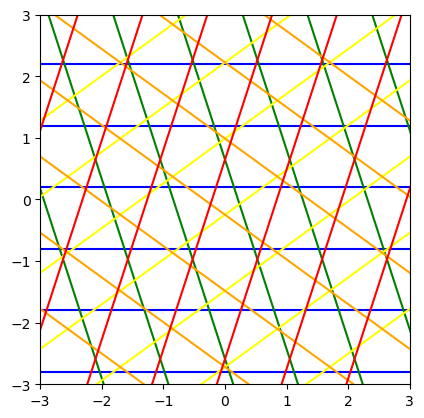

In [11]:
colors = ["blue", "green", "yellow", "orange", "red"]
colors = np.repeat(colors, len(lines) / 5)

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

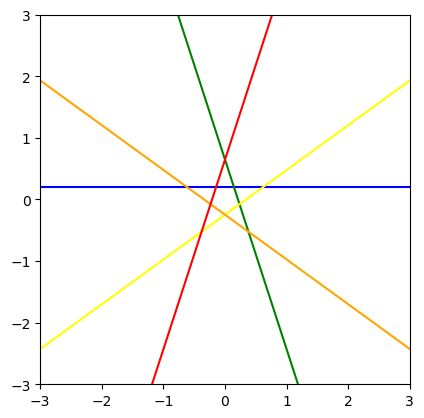

In [12]:
grids = []
for row in vectors:
    for k in np.arange(1):
        grids.append(Line(row[1], row[2], row[3] + k, row[0]))

boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

lines = []

for l in grids:
    points = []
    for b in boundary:
        intersection = l.determine_intersection(b)
        if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
            points.append(intersection)
    lines.append(points)

colors = ["blue", "green", "yellow", "orange", "red"]
colors = np.repeat(colors, len(lines) / 5)

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

In [13]:
from itertools import combinations
from collections import defaultdict

intersections = defaultdict(set)
for pair in combinations(grids, 2):
    l1 = pair[0]
    l2 = pair[1]
    intersection = l1.determine_intersection(l2)
    if intersection != (np.inf, np.inf):
        intersections[intersection].update([l1, l2])

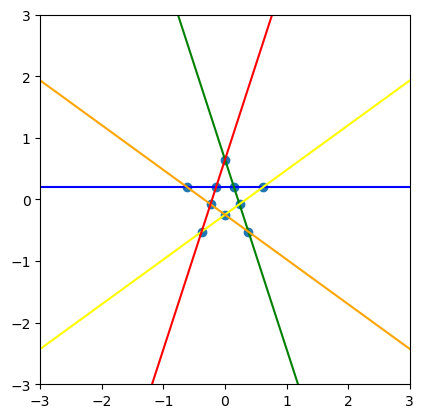

In [14]:
intersection_points = list(intersections)

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))
ax.scatter(*zip(*intersection_points))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

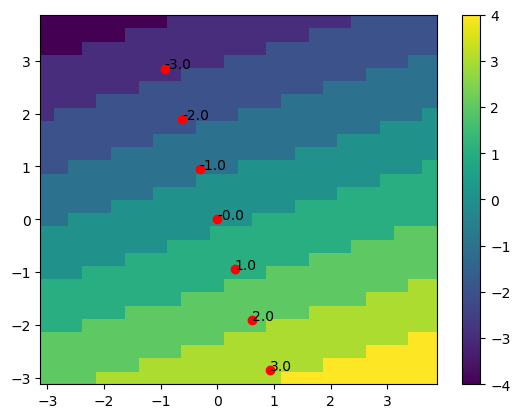

In [15]:
def determine_K(c, x, s, y, o):
    return np.ceil(c * x + s * y - o)

grid = 4
lb = -3
ub = 4

points_x = [cos_list[grid] * x for x in np.arange(lb, ub)]
points_y = [sin_list[grid] * y for y in np.arange(lb, ub)]
points_label = [determine_K(cos_list[grid], x, sin_list[grid], y, offsets[grid]) for x, y in zip(points_x, points_y)]

X, Y = np.meshgrid(np.arange(lb, ub, .25), np.arange(lb, ub, .25))
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
   for j in range(X.shape[1]):
       Z[i,j] = determine_K(cos_list[grid], X[i,j], sin_list[grid], Y[i,j], offsets[grid])

for x, y, l in zip(points_x, points_y, points_label):
    plt.text(x, y, l)

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.scatter(points_x, points_y, color='red')
plt.show()

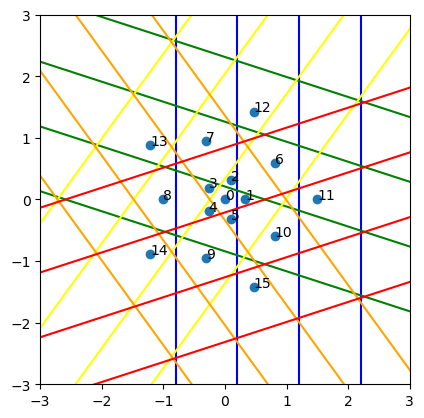

In [16]:
k_points = [(0, 0)]

for c, s in zip(cos_list, sin_list):
    k_points.append((c * .33, s * .33))

for turn in np.arange(5):
    k_points.append((np.cos((turn * 2 * np.pi + np.pi) / 5), 
                   np.sin((turn * 2 * np.pi + np.pi) / 5)))
    
for c, s in zip(cos_list, sin_list):  
    k_points.append((c * 1.5, s * 1.5))

grids = []
for i, (s, c, o) in enumerate(zip(sin_list, cos_list, offsets)):
    for k in np.arange(-1, 3):
        grids.append(Line(c, s, o + k, i))

boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

lines = []

for l in grids:
    points = []
    for b in boundary:
        intersection = l.determine_intersection(b)
        if intersection:
            if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
                points.append(intersection)
    lines.append(points)

colors = ["blue", "green", "yellow", "orange", "red"]
colors = np.repeat(colors, len(lines) / 5)

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))
for i, p in enumerate(k_points):
    ax.text(x=p[0], y=p[1], s=i)
ax.scatter(*zip(*k_points))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

In [17]:
for i, p in enumerate(points):
    this_k = []
    for c, s, o in zip(cos_list, sin_list, offsets):
        this_k.append(str(determine_K(c, p[0], s, p[1], o)))
    this_k = '[' + ', '.join(this_k) + ']'
    print(i, this_k)


0 [5.0, 1.0, -4.0, -3.0, 2.0]
1 [-5.0, -5.0, 2.0, 7.0, 2.0]


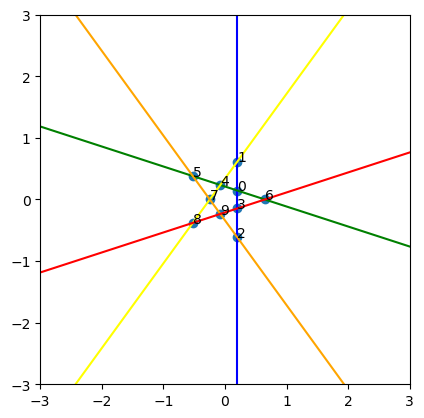

In [61]:
# reset back to fewer lines
grids = []
for i, (s, c, o) in enumerate(zip(sin_list, cos_list, offsets)):
    for k in np.arange(1):
        grids.append(Line(c, s, o + k, i))

boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

lines = []

for l in grids:
    points = []
    for b in boundary:
        intersection = l.determine_intersection(b)
        if intersection:
            if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
                points.append(intersection)
    lines.append(points)

colors = ["blue", "green", "yellow", "orange", "red"]
colors = np.repeat(colors, len(lines) / 5)

intersections = defaultdict(set)
for pair in combinations(grids, 2):
    l1 = pair[0]
    l2 = pair[1]
    intersection = l1.determine_intersection(l2)
    if intersection:
        intersections[intersection].update([l1, l2])

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))
for i, p in enumerate(list(intersections)):
    ax.text(x=p[0], y=p[1], s=i)
ax.scatter(*zip(*intersection_points))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

Need to move around the point by moving the Ks up one and back on the lines that meet at the intersection.
We can't trust the K outright because sometimes it hits the lower value and sometimes it hits the higher one.
So we can drop to the lower K by changing the offsets just a little, then add 1 to the K on the intersection lines when needed to loop around the points
We can't just move the intersection point, because we might cross over another line and change that grid's K,
so we only change the K values for the intersection points

Update K for each line as we cross it, then lower it back down as we cross it again.

In [58]:
normals = np.array([[i, c, s, o] for i, (c, s, o) in enumerate(zip(cos_list, sin_list, offsets))])
double_normals = np.concatenate([normals, normals])
double_normals[len(offsets):, 3] = np.sign(offsets) * (np.abs(offsets) - 1)
angles = np.array([np.arctan2(double_normals[:, 1] * double_normals[:, 3], double_normals[:, 2] * double_normals[:, 3])]).reshape(-1, 1)
double_normals = np.append(double_normals, angles, 1)
double_normals = double_normals[double_normals[:, 4].argsort()]
double_normals

array([[ 1.        ,  0.30901699,  0.95105652, -0.8       , -2.82743339],
       [ 3.        , -0.80901699, -0.58778525,  0.2       , -2.19911486],
       [ 0.        ,  1.        ,  0.        , -0.8       , -1.57079633],
       [ 2.        , -0.80901699,  0.58778525,  0.2       , -0.9424778 ],
       [ 4.        ,  0.30901699, -0.95105652, -0.8       , -0.31415927],
       [ 1.        ,  0.30901699,  0.95105652,  0.2       ,  0.31415927],
       [ 3.        , -0.80901699, -0.58778525, -0.8       ,  0.9424778 ],
       [ 0.        ,  1.        ,  0.        ,  0.2       ,  1.57079633],
       [ 2.        , -0.80901699,  0.58778525, -0.8       ,  2.19911486],
       [ 4.        ,  0.30901699, -0.95105652,  0.2       ,  2.82743339]])

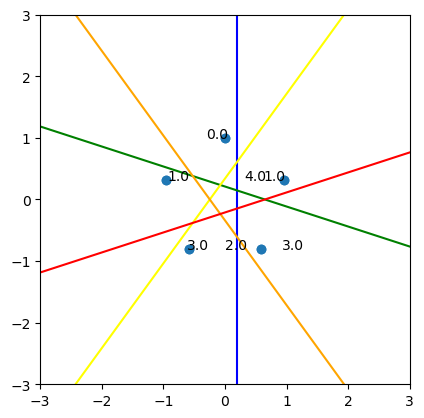

In [69]:
point_x = double_normals[:, 2]
point_y = double_normals[:, 1]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))
for i, (x, y) in enumerate(zip(points_x, point_y)):
    ax.text(x=x, y=y, s=double_normals[i, 0])
ax.scatter(point_x, point_y)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

# Lines and offsets don't match this way?
# Everything is turned sideways when using the Line class

In [70]:
point_y

array([ 0.30901699, -0.80901699,  1.        , -0.80901699,  0.30901699,
        0.30901699, -0.80901699,  1.        , -0.80901699,  0.30901699])

In [20]:


for i, (intersection, lines) in enumerate(intersections.items()):
    grid_numbers = []
    for l in lines:
        grid_numbers.append(l.grid)

    this_offsets = offsets.copy()
    for g in grid_numbers:
        this_offsets[g] += .5 # flip with -.5 to get both sides of the point

    ks = [determine_K(c, intersection[0], s, intersection[1], o) for c, s, o in zip(cos_list, sin_list, this_offsets)]

    print(i, ks, grid_numbers)

0 [-0.0, -0.0, -0.0, -0.0, -0.0] [1, 0]
1 [-0.0, 1.0, -0.0, -0.0, -0.0] [2, 0]
2 [-0.0, -0.0, -0.0, -0.0, 1.0] [0, 3]
3 [-0.0, -0.0, -0.0, -0.0, -0.0] [0, 4]
4 [-0.0, -0.0, -0.0, -0.0, -0.0] [1, 2]
5 [-0.0, -0.0, 1.0, -0.0, -0.0] [1, 3]
6 [1.0, -0.0, -0.0, -0.0, -0.0] [1, 4]
7 [-0.0, -0.0, -0.0, -0.0, -0.0] [2, 3]
8 [-0.0, -0.0, -0.0, 1.0, -0.0] [2, 4]
9 [-0.0, -0.0, -0.0, -0.0, -0.0] [4, 3]


In [135]:
for intersection, lines in intersections.items():
    grid_numbers = []
    for l in lines:
        grid_numbers.append(l.grid)

    this_offsets = offsets.copy()
    for g in grid_numbers:
        this_offsets[g] += .5

    ks = [determine_K(c, intersection[0], s, intersection[1], o) for c, s, o in zip(cos_list, sin_list, this_offsets)]
    print(f'k: {ks}')

    points = []
    for r in range(len(grid_numbers) + 1):
        for intersection_grids in combinations(grid_numbers, r):
            this_k = ks.copy()
            for grid in intersection_grids:
                this_k[grid] += 1
            
            point = np.array([0, 0], dtype=float)
            for k, c, s in zip(this_k, cos_list, sin_list):
                point += k * np.array([c, s])
            points.append(point)

k: [-0.0, -0.0, -0.0, -0.0, -0.0]
k: [-0.0, 1.0, -0.0, -0.0, -0.0]
k: [-0.0, -0.0, -0.0, -0.0, 1.0]
k: [-0.0, -0.0, -0.0, -0.0, -0.0]
k: [-0.0, -0.0, -0.0, -0.0, -0.0]
k: [-0.0, -0.0, 1.0, -0.0, -0.0]
k: [1.0, -0.0, -0.0, -0.0, -0.0]
k: [-0.0, -0.0, -0.0, -0.0, -0.0]
k: [-0.0, -0.0, -0.0, 1.0, -0.0]
k: [-0.0, -0.0, -0.0, -0.0, -0.0]


In [99]:
points = []
for r in range(len(grid_numbers) + 1):
    for intersection_grids in combinations(grid_numbers, r):
        this_k = ks.copy()
        for grid in intersection_grids:
            this_k[grid] += 1
        
        print(intersection_grids)

        point = np.array([0, 0], dtype=float)
        for k, c, s in zip(this_k, cos_list, sin_list):
            point += k * np.array([c, s])
        points.append(point)

()
(3,)
(4,)
(3, 4)


In [94]:
# sort points
mean_x = np.mean([x[0] for x in points])
mean_y = np.mean([y[1] for y in points])

angles = []
for point in points:
    angles.append(np.arctan2(point[1] - mean_y, point[0] - mean_x))

polygon = [point for _, point in sorted(zip(angles, points))]

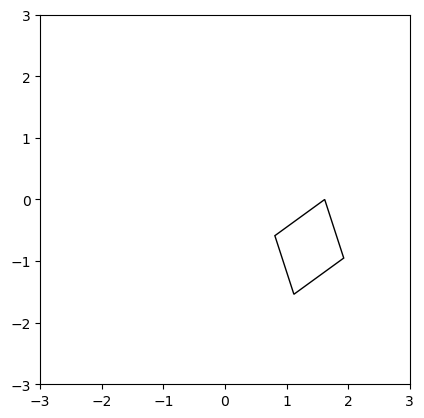

In [95]:
from matplotlib.patches import Polygon

p = Polygon(polygon, facecolor = 'w', edgecolor="k")

fig,ax = plt.subplots()

ax.add_patch(p)
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_aspect('equal')
plt.show()

In [136]:
polygons = []
for intersection, lines in intersections.items():
    grid_numbers = []
    for l in lines:
        grid_numbers.append(l.grid)

    this_offsets = offsets.copy()
    for g in grid_numbers:
        this_offsets[g] += .5

    ks = [determine_K(c, intersection[0], s, intersection[1], o) for c, s, o in zip(cos_list, sin_list, this_offsets)]
    print(f'k: {ks}, g: {grid_numbers}')

    points = []
    for r in range(len(grid_numbers) + 1):
        for intersection_grids in combinations(grid_numbers, r):
            this_k = ks.copy()
            for grid in intersection_grids:
                this_k[grid] += 1
            
            point = np.array([0, 0], dtype=float)
            for k, c, s in zip(this_k, cos_list, sin_list):
                point += k * np.array([c, s])
            points.append(point)

    mean_x = np.mean([x[0] for x in points])
    mean_y = np.mean([y[1] for y in points])

    angles = []
    for point in points:
        angles.append(np.arctan2(point[1] - mean_y, point[0] - mean_x))

    polygon = [point for _, point in sorted(zip(angles, points))]
    polygons.append(polygon)

#polygons

k: [-0.0, -0.0, -0.0, -0.0, -0.0], g: [1, 0]
k: [-0.0, 1.0, -0.0, -0.0, -0.0], g: [0, 2]
k: [-0.0, -0.0, -0.0, -0.0, 1.0], g: [3, 0]
k: [-0.0, -0.0, -0.0, -0.0, -0.0], g: [0, 4]
k: [-0.0, -0.0, -0.0, -0.0, -0.0], g: [1, 2]
k: [-0.0, -0.0, 1.0, -0.0, -0.0], g: [1, 3]
k: [1.0, -0.0, -0.0, -0.0, -0.0], g: [1, 4]
k: [-0.0, -0.0, -0.0, -0.0, -0.0], g: [3, 2]
k: [-0.0, -0.0, -0.0, 1.0, -0.0], g: [4, 2]
k: [-0.0, -0.0, -0.0, -0.0, -0.0], g: [3, 4]


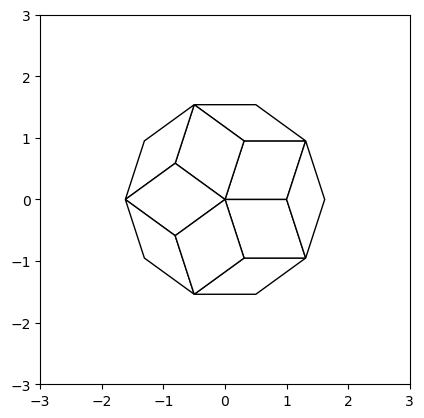

In [137]:
fig,ax = plt.subplots()

for polygon in polygons:
    p = Polygon(polygon, facecolor = 'w', edgecolor="k")
    ax.add_patch(p)
    
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_aspect('equal')
plt.show()